#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

#### LOADING THE CSV FILE

In [2]:
SmartMoney= pd.read_csv('SmartMoney.csv')

SmartMoney

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4,5,2022,10,4,May,2022,13
1,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,25,10,2021,16,24,October,2021,14
2,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,False,25.0,Male,3,10000,20,5,2022,14,27,May,2022,12
3,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,False,25.0,Male,5,252000,12,4,2022,15,7,February,2022,12
4,MICHAEL MUSEMBI,Bills & Fees,60,False,25.0,Male,3,10000,4,5,2022,10,4,May,2022,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10368,FESTUS MBITHI MUTINDA,Bills & Fees,30,False,25.0,Male,1,5000,12,4,2022,15,9,April,2022,15
10369,UONSDA CHURCH TITHE-MAIN,Bills & Fees,100,False,25.0,Male,1,5000,12,4,2022,15,9,April,2022,9
10370,MAWINGU AIRTIME LIMITED,Bills & Fees,20,False,25.0,Male,1,5000,12,4,2022,15,10,April,2022,18
10371,CIC MONEY MARKET FUND,Bills & Fees,105300,False,27.0,Female,1,35000,12,4,2022,15,29,December,2021,11


In [3]:
SmartMoney.corr()

/var/folders/40/hpv0h46j20gg7j7wlhwpz6f80000gq/T/ipykernel_2949/765930170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SmartMoney.corr()


,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Year_PURCHASED,Hour_PURCHASED
PURCHASE_VALUE,1.000000,0.065059,0.041676,-0.021596,0.028640,-0.009516,0.053995,-0.052689,-0.062762,-0.020839,-0.055041,-0.026273
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.065059,1.000000,0.001415,-0.027016,-0.022632,0.048509,0.341099,-0.364379,-0.429431,-0.012425,0.039820,-0.044746
USER_AGE,0.041676,0.001415,1.000000,-0.046161,-0.114957,-0.013179,0.011155,-0.016681,-0.009834,0.002503,0.007832,-0.002157
USER_HOUSEHOLD,-0.021596,-0.027016,-0.046161,1.000000,0.549893,-0.028996,0.003251,0.002840,0.028166,0.005920,0.141374,0.005363
USER_INCOME,0.028640,-0.022632,-0.114957,0.549893,1.000000,-0.014919,-0.033991,0.030771,0.029395,0.013105,0.059052,0.045040
Day_MERCHANT,-0.009516,0.048509,-0.013179,-0.028996,-0.014919,1.000000,-0.160569,0.181921,0.317740,0.039720,0.014958,0.007993
Month_MERCHANT,0.053995,0.341099,0.011155,0.003251,-0.033991,-0.160569,1.000000,-0.945400,-0.637485,0.002780,0.011797,0.000648
Year_MERCHANT,-0.052689,-0.364379,-0.016681,0.002840,0.030771,0.181921,-0.945400,1.000000,0.674597,-0.006144,-0.001957,0.006717
Hour_MERCHANT,-0.062762,-0.429431,-0.009834,0.028166,0.029395,0.317740,-0.637485,0.674597,1.000000,0.021766,-0.018859,0.021376
Day_PURCHASED,-0.020839,-0.012425,0.002503,0.005920,0.013105,0.039720,0.002780,-0.006144,0.021766,1.000000,-0.029292,0.009331


### What is the distribution of the target variable 'MERCHANT_CATEGORIZED_AS'? (To understand the class balance)

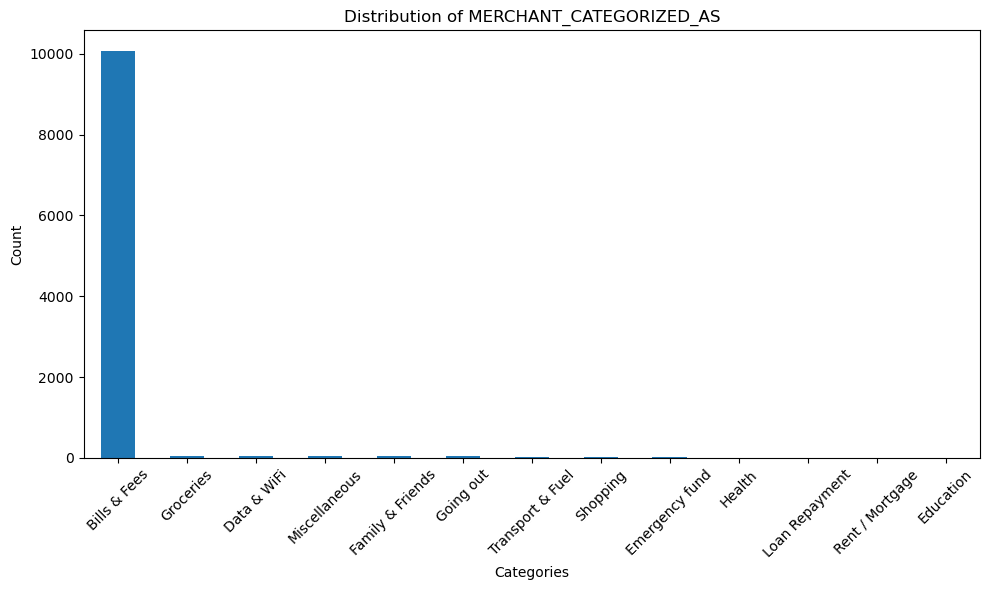

In [4]:


# Assuming 'MERCHANT_CATEGORIZED_AS' is a categorical column
class_counts = SmartMoney['MERCHANT_CATEGORIZED_AS'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution of MERCHANT_CATEGORIZED_AS')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### How does the 'USER_HOUSEHOLD' variable influence the merchant categorization? (To study the effect of household type on merchant preferences)

<Figure size 1000x600 with 0 Axes>

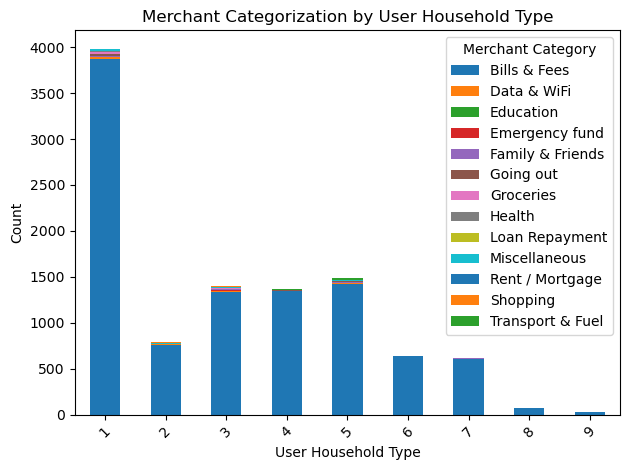

In [6]:


# Create a cross-tabulation (crosstab) of USER_HOUSEHOLD and MERCHANT_CATEGORIZED_AS
cross_tab = pd.crosstab(SmartMoney['USER_HOUSEHOLD'],SmartMoney['MERCHANT_CATEGORIZED_AS'])

# Plotting the cross-tabulation
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Merchant Categorization by User Household Type')
plt.xlabel('User Household Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Merchant Category')

plt.tight_layout()
plt.show()


### What is the average 'PURCHASE_VALUE' for each 'MERCHANT_CATEGORIZED_AS' category? (To compare purchase values across different merchant categories)

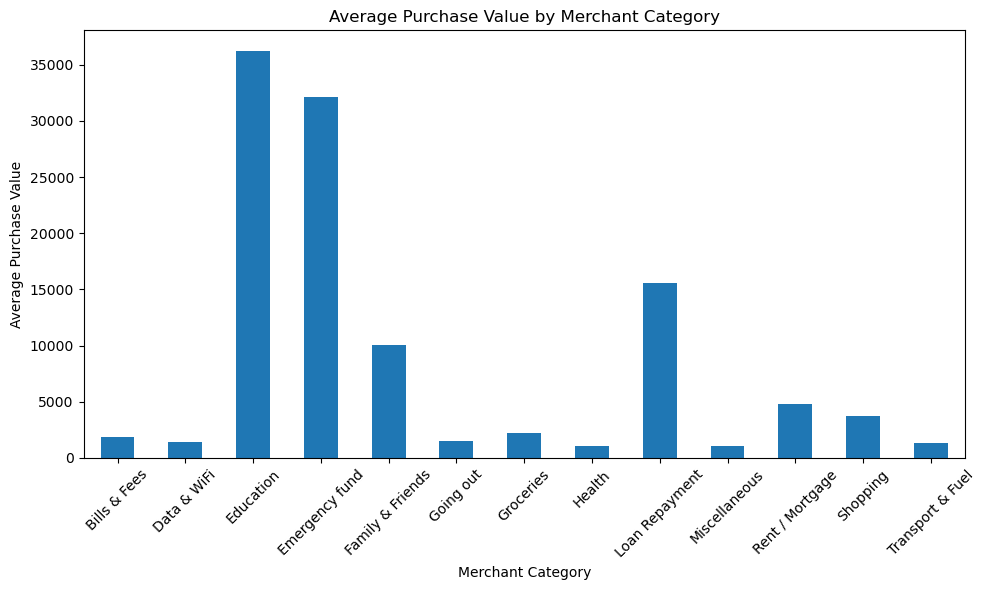

In [7]:


# Group the data by 'MERCHANT_CATEGORIZED_AS' and calculate the average 'PURCHASE_VALUE'
average_purchase_by_category = SmartMoney.groupby('MERCHANT_CATEGORIZED_AS')['PURCHASE_VALUE'].mean()

# Plotting the average purchase value for each category
plt.figure(figsize=(10, 6))
average_purchase_by_category.plot(kind='bar')
plt.title('Average Purchase Value by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:


# Separate the target variable from the features
X =SmartMoney .drop('MERCHANT_CATEGORIZED_AS', axis=1)  # Features
y =SmartMoney['MERCHANT_CATEGORIZED_AS']  # Target variable

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their corresponding MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Plotting the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.title('Mutual Information Scores with Merchant Category')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()

plt.show()


### What is the distribution of 'USER_AGE' in the dataset? (To understand the age distribution of users)

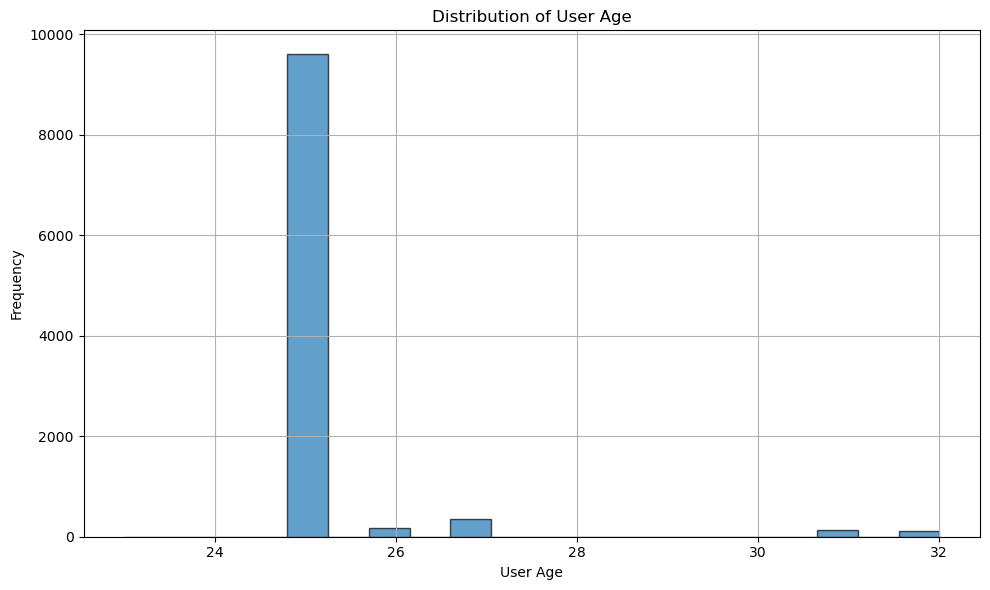

In [10]:

# Plotting the distribution of USER_AGE
plt.figure(figsize=(10, 6))
plt.hist(SmartMoney['USER_AGE'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of User Age')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()


### Is there any correlation between 'PURCHASE_VALUE' and the target variable? (To explore the relationship between purchase value and merchant categories)

<Figure size 1000x600 with 0 Axes>

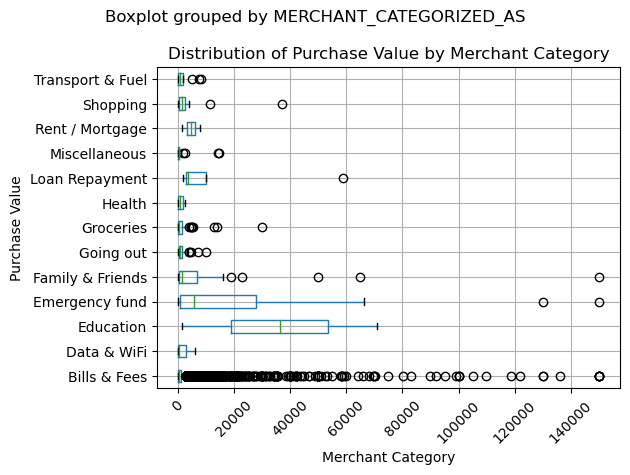

In [11]:


# Box plot of purchase values for each merchant category
plt.figure(figsize=(10, 6))
SmartMoney.boxplot(column='PURCHASE_VALUE', by='MERCHANT_CATEGORIZED_AS', vert=False)
plt.title('Distribution of Purchase Value by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Purchase Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### What is the average 'USER_INCOME' among different merchant categories? (To analyze the relationship between income and merchant categories)

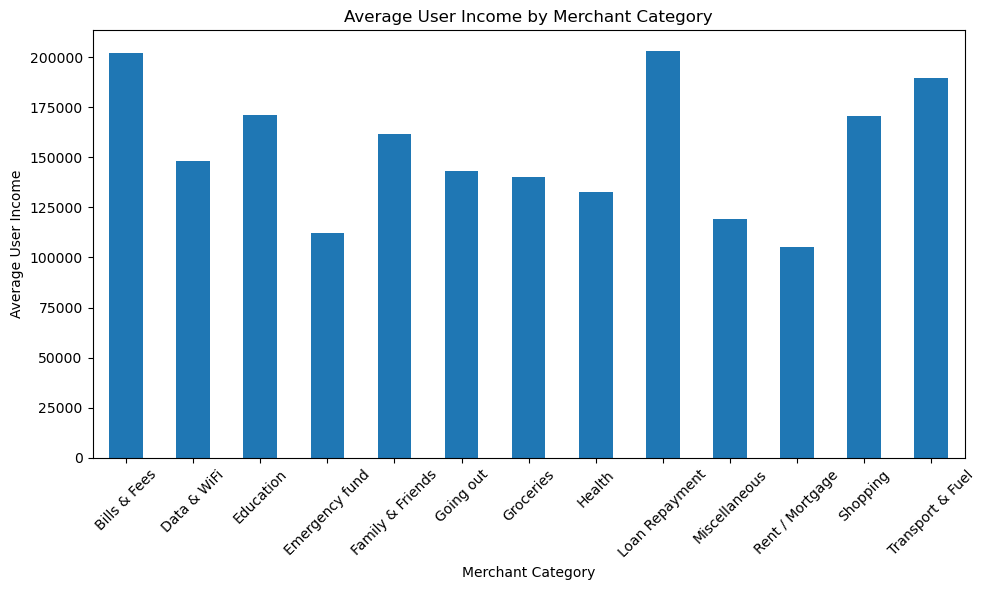

In [12]:


# Calculate the average 'USER_INCOME' for each 'MERCHANT_CATEGORIZED_AS' category
average_income_by_category = SmartMoney.groupby('MERCHANT_CATEGORIZED_AS')['USER_INCOME'].mean()

# Plotting the average user income for each merchant category
plt.figure(figsize=(10, 6))
average_income_by_category.plot(kind='bar')
plt.title('Average User Income by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Average User Income')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Create a scatter plot to visualize the relationship between 'USER_AGE' and 'USER_INCOME'. Are there any trends or patterns in this relationship?

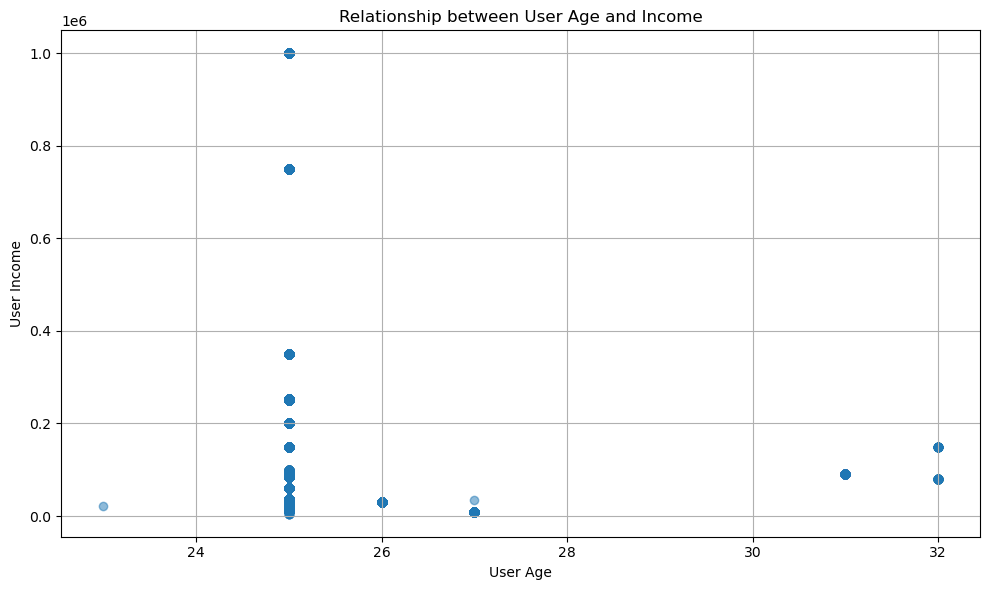

In [14]:


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(SmartMoney['USER_AGE'], SmartMoney['USER_INCOME'], alpha=0.5)
plt.title('Relationship between User Age and Income')
plt.xlabel('User Age')
plt.ylabel('User Income')
plt.grid(True)
plt.tight_layout()

plt.show()


### Create a bar chart to show the count of purchases made via M-Pesa ('IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY') vs. other payment methods for different 'MERCHANT_CATEGORIZED_AS' categories.

<Figure size 1200x600 with 0 Axes>

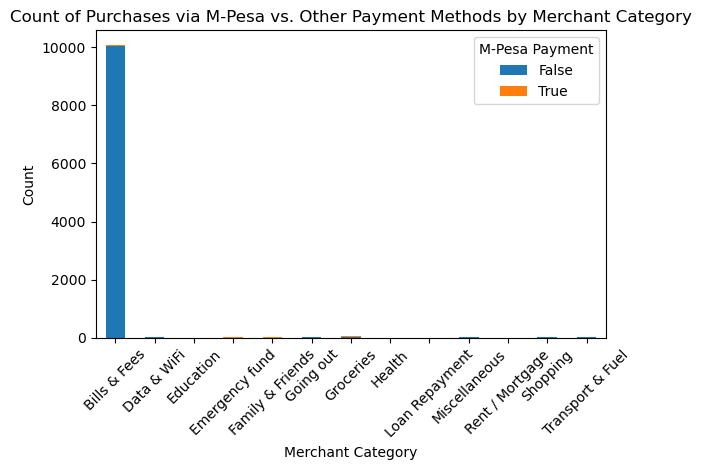

In [15]:


# Group the data by 'MERCHANT_CATEGORIZED_AS' and 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', and calculate the counts
purchase_counts = SmartMoney.groupby(['MERCHANT_CATEGORIZED_AS', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY']).size().unstack()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
purchase_counts.plot(kind='bar', stacked=True)
plt.title('Count of Purchases via M-Pesa vs. Other Payment Methods by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='M-Pesa Payment')
plt.tight_layout()

plt.show()


### Analyze the distribution of 'PURCHASE_VALUE' across different hours of the day ('Hour_PURCHASED') using a histogram or density plot.

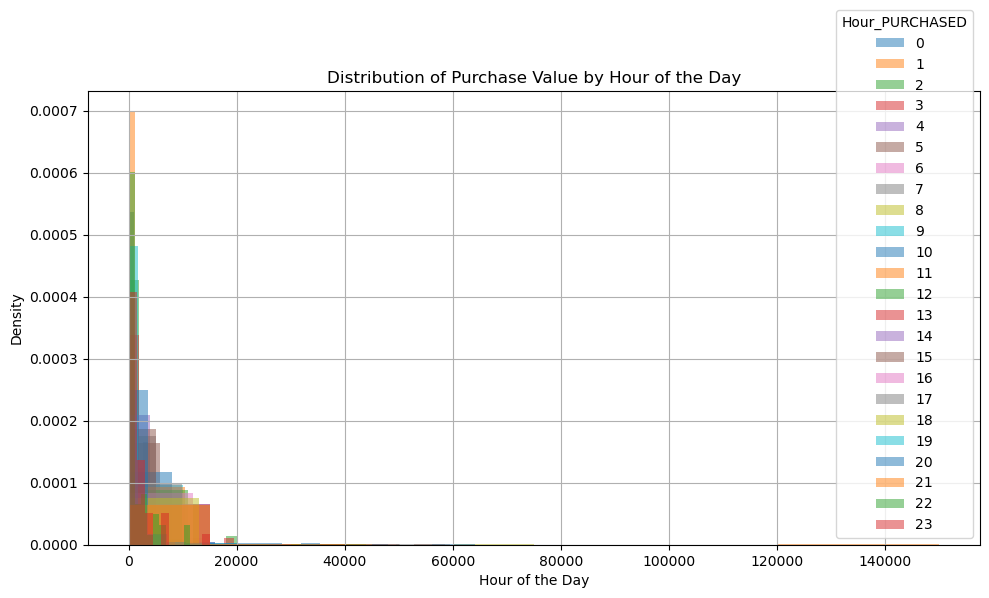

In [16]:

# Plotting the histogram or density plot
plt.figure(figsize=(10, 6))
SmartMoney.groupby('Hour_PURCHASED')['PURCHASE_VALUE'].plot(kind='hist', alpha=0.5, density=True)
plt.title('Distribution of Purchase Value by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend(title='Hour_PURCHASED')
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:


# Group the data by 'MERCHANT_CATEGORIZED_AS' and 'YEAR' and calculate the average 'PURCHASE_VALUE'
average_purchase_by_category_year =SmartMoney.groupby(['MERCHANT_CATEGORIZED_AS', 'year'])['PURCHASE_VALUE'].mean().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
average_purchase_by_category_year.plot(kind='bar')
plt.title('Average Purchase Value by Merchant Category and Year')
plt.xlabel('Merchant Category')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()

plt.show()


### Create a heatmap to show the correlation between 'PURCHASE_VALUE', 'USER_AGE', and 'USER_INCOME' variables. This can help identify any relationships or dependencies between these numerical features.

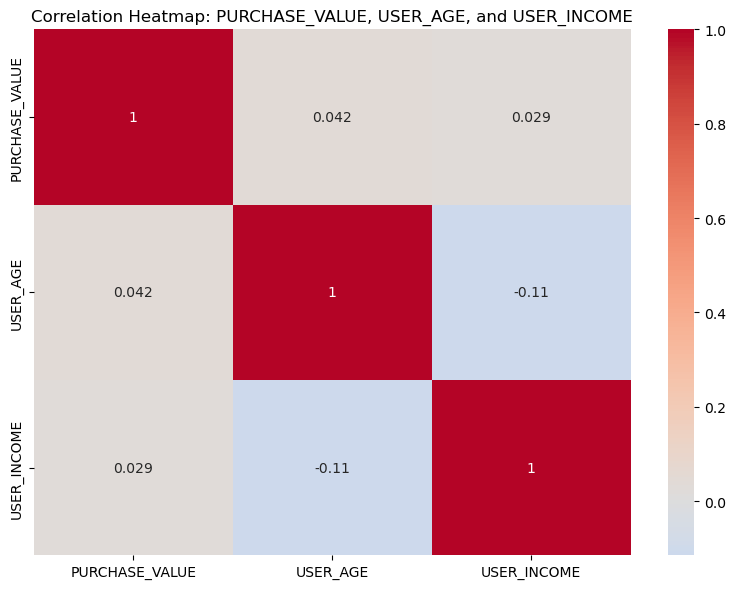

In [20]:


# Calculate the correlation matrix
corr_matrix = SmartMoney[['PURCHASE_VALUE', 'USER_AGE', 'USER_INCOME']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: PURCHASE_VALUE, USER_AGE, and USER_INCOME')
plt.tight_layout()

plt.show()


### How does the 'USER_INCOME' vary across different 'USER_GENDER' groups? Create a box plot or histogram to compare the income distribution between males and females.

<Figure size 800x600 with 0 Axes>

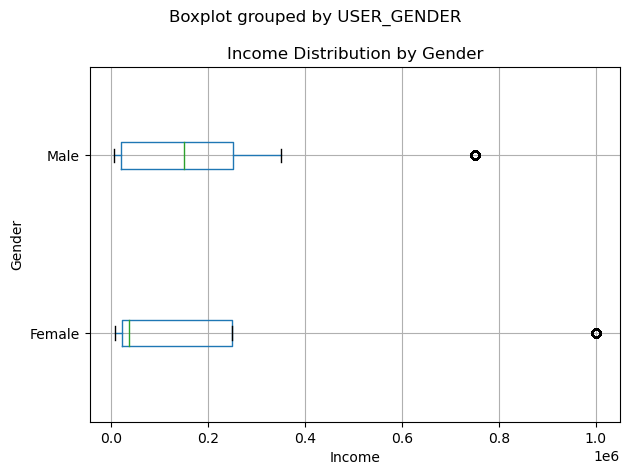

In [21]:



# Plotting the box plot
plt.figure(figsize=(8, 6))
SmartMoney.boxplot(column='USER_INCOME', by='USER_GENDER', vert=False)
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Gender')
plt.tight_layout()

plt.show()
